In [1]:
import matplotlib.pyplot as plt
import sklearn.datasets as skdata
import numpy as np

%matplotlib inline

In [2]:
numeros = skdata.load_digits()
target = numeros['target']
imagenes = numeros['images']
n_imagenes = len(target)
print(np.shape(imagenes), n_imagenes) # Hay 1797 digitos representados en imagenes 8x8

(1797, 8, 8) 1797


[[ 0.  0.  3. 13. 11.  7.  0.  0.]
 [ 0.  0. 11. 16. 16. 16.  2.  0.]
 [ 0.  4. 16.  9.  1. 14.  2.  0.]
 [ 0.  4. 16.  0.  0. 16.  2.  0.]
 [ 0.  0. 16.  1.  0. 12.  8.  0.]
 [ 0.  0. 15.  9.  0. 13.  6.  0.]
 [ 0.  0.  9. 14.  9. 14.  1.  0.]
 [ 0.  0.  2. 12. 13.  4.  0.  0.]]


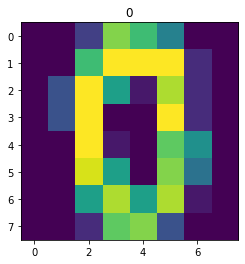

In [3]:
i=20 # este es uno de esos digitos
_ = plt.imshow(imagenes[i])
plt.title('{}'.format(target[i]))
print(imagenes[i])


In [4]:
# para poder correr PCA debemos "aplanar las imagenes"
data = imagenes.reshape((n_imagenes, -1)) # para volver a tener los datos como imagen basta hacer data.reshape((n_imagenes, 8, 8))
print(np.shape(data))

(1797, 64)


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
# Vamos a hacer un split training test
scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(data, target, train_size=0.7)

In [7]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [8]:
# Vamos a entrenar solamente con los digitos iguales a 1
def pca_imgs(x,y,numero = 1):
    dd = y_train==numero
    cov = np.cov(x_train[dd].T)
    valores, vectores = np.linalg.eig(cov)
    valores = np.real(valores)
    vectores = np.real(vectores)
    ii = np.argsort(-valores)
    valores = valores[ii]
    vectores = vectores[:,ii]

    plt.figure(figsize=(15,5))
    plt.subplot(2,3,1)
    plt.title("Matriz de Covarianza")
    plt.imshow(cov)

    plt.subplot(2,3,2)
    plt.title("Varianza explicada")
    plt.plot(np.cumsum(valores)/np.sum(valores))
    plt.xlabel("Componentes")
    plt.ylabel("Fraccion")
    max_comps = (np.count_nonzero((np.cumsum(valores)/np.sum(valores))<0.6))
    print(max_comps+1) # Necesito este numero de componentes para tener al menos el 60 de la varianza.

    plt.subplot(2,3,4)
    plt.imshow(vectores[:,0].reshape(8,8))
    plt.title('Primer Eigenvector')
    plt.subplot(2,3,5)
    plt.title('Segundo Eigenvector')
    plt.imshow(vectores[:,1].reshape(8,8))
    plt.subplot(2,3,6)
    plt.title('Tercer Eigenvector')
    plt.imshow(vectores[:,2].reshape(8,8))
    plt.subplots_adjust(hspace=0.5)
    return valores, vectores

2
2


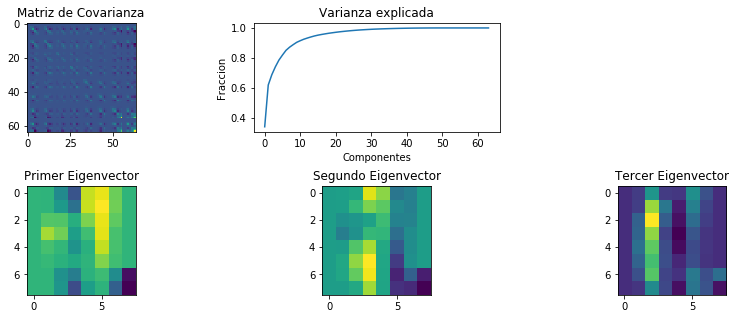

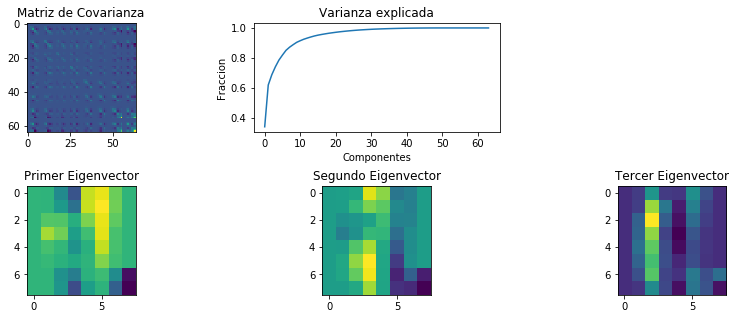

In [9]:
valores_train, vectores_train=pca_imgs(x_train,y_train,numero = 1)
valores_test, vectores_test=pca_imgs(x_test,y_test,numero = 1)

In [28]:
#a=[[0,1,2],[0,1,2],[0,1,2]]
#b=[[2,3,4],[2,3,4],[2,3,4]]
for i in range(len(vectores_train)):
    print(np.dot(vectores_train[i],vectores_test[i]))

1.0
1.0000000000000084
0.9999999999999678
0.9999999999999819
0.9999999999999849
0.9999999999999993
0.9999999999999438
1.3955748087320927
1.9837334236829998
0.9999999999999677
0.9999999999999875
0.9999999999999879
0.9999999999999841
1.0000000000000338
0.9999999999999584
1.0
0.491385619628147
0.9999999999999789
0.9999999999999694
0.9999999999999838
1.0000000000000928
1.000000000000056
1.000000000000019
1.726580631462594
0.7057057110803291
0.9999999999999927
1.0000000000000298
1.0000000000000007
1.000000000000056
1.0000000000000215
1.0000000000000209
0.734647435178109
1.0
1.0000000000000342
1.0000000000000326
1.0000000000000226
1.0000000000000198
1.0000000000001072
0.9999999999999524
1.0
0.12926485772822582
1.0000000000000109
1.000000000000011
1.0000000000000002
0.9999999999999495
0.9999999999999618
1.0000000000000138
0.10638674306574061
0.19444620936736468
1.0000000000000009
0.9999999999999942
0.9999999999999878
0.9999999999999812
1.0000000000000022
0.9999999999999729
1.0000000000000004


In [18]:
np.dot(vectores_test,vectores_train)
#np.shape(vectores_test)

array([[ 4.47194140e-04,  1.77505578e-03,  1.18588685e-02, ...,
         1.83187867e-14, -2.39674221e-14,  8.27922197e-16],
       [-3.49630108e-02, -1.07295080e-02, -4.53525655e-03, ...,
         1.22624689e-01, -7.40323797e-02, -8.39957611e-03],
       [-1.76141267e-01, -4.35069459e-02, -1.95022779e-01, ...,
         1.03401107e-01, -1.11563843e-02,  5.62442849e-02],
       ...,
       [ 1.21645243e-02,  4.69322709e-02, -8.75915416e-02, ...,
        -1.30041597e-01,  1.58317428e-01, -4.38891156e-01],
       [ 2.26793646e-03, -4.02100190e-02, -2.85048580e-01, ...,
         1.22825838e-01, -1.01368572e-01, -1.44991034e-01],
       [-9.70585604e-02, -1.94614053e-02,  8.85059861e-02, ...,
        -6.96216467e-02, -3.61743563e-03,  2.97113936e-02]])

In [27]:
vectores_train[1]

array([-1.82742503e-03,  6.49266635e-03,  2.28257029e-02,  1.87638065e-03,
       -8.96081511e-03,  6.24388835e-03,  1.22258709e-02, -5.03698959e-03,
       -6.16508797e-03, -1.24348095e-02,  2.32829075e-02,  5.84152187e-03,
        5.16185428e-02,  3.11217479e-02, -7.64669455e-03, -1.52158249e-02,
       -3.88923872e-02, -5.18666153e-02,  2.73288603e-02, -6.90330356e-02,
       -1.33030022e-02, -1.52047821e-01, -6.90044647e-02, -7.27975434e-03,
       -2.65203243e-02, -4.34082442e-02,  2.94901116e-02, -1.15048303e-01,
       -7.78592252e-02, -7.53710651e-02,  2.15409199e-02, -1.46102384e-01,
       -9.64535030e-02, -1.07568820e-01,  8.00139627e-02, -2.67846575e-02,
       -8.87054273e-02, -1.52768060e-01,  5.11003725e-02,  7.42353436e-02,
        1.98484527e-01,  1.68086734e-02, -1.05523968e-01,  3.16349368e-02,
        1.45660270e-01,  1.10468105e-01,  6.21859867e-01,  5.90004468e-01,
       -1.33418021e-01, -3.46335547e-02,  2.79585599e-15,  2.79585599e-15,
        2.53308098e-15,  